In [1]:
import pandas as pd
import numpy as np

In [2]:
members_13 = pd.read_csv('members_13.csv', parse_dates=['birthday', 'entry_date'])
members_13.head(3)

,member_name,birthday,sex,profession,salary_usd$,entry_date,group_id,city_name,state_name,age,fun_club_name,category_id,monthly_fee_USD$,category_name,membership_duration_days,"sum_fee_paid, USD$"
0,Vanessa Casey,1960-08-08,F,"Engineer, manufacturing systems",1884,2018-05-24,19927387,Montgomery,West Virginia,63,Events That Make You Smarter,6,7,Education & Learning,1803,421.0
1,Cheryl Carey,1958-12-11,N,Trade union research officer,1518,2019-11-14,19712846,Colonia,New Jersey,65,Mix Professionals Chicago,9,18,Fitness,1264,758.0
2,Kendra Valdez,1962-06-16,M,Press photographer,1669,2018-08-06,10528562,Pinckney,Michigan,61,Madison Square Park Mommies!,25,19,Parents & Family,1729,1095.0


In [3]:
# переименуем "проблемные колонки"
members_13 = members_13.rename(columns={'sex':'member_gender', 'age':'member_age','birthday':'member_birthday','salary_usd$':'member_salary', 'monthly_fee_USD$':'monthly_fee', 'sum_fee_paid, USD$':'sum_fee_paid'})

In [4]:
founders_1=pd.read_csv('founders_1.csv', parse_dates=['birthday', 'foundation_date'])
founders_1.head(3)

,name,birthday,sex,email,address,company,profession,salary_usd$,foundation_date,city_id,city_name,state_id,state_code,state_name,funs_club,age
0,Daniel Carter,1965-01-12,M,law@gmail.com,0172 Howard Hill Suite 460\nNorth Peterborough...,"Campbell, Wang and Russell",Furniture designer,4889,2017-12-26,121610,Medway,1433,MA,Massachusetts,Alternative Health NYC,58
1,Samuel Ramirez,1995-12-06,N,pay@gmail.com,"41969 Seth Centers Apt. 977\nBakerville, OK 04560","Ross, Wallace and Williams",Best boy,4109,2018-07-08,125110,Richwood,1417,NJ,New Jersey,Energy Healers NYC,28
2,Frederick Keller,1960-05-10,F,factor@gmail.com,Unit 4661 Box 5647\nDPO AP 93978,"Ward, Adams and Gonzalez","Editor, film/video",4461,2019-08-05,124330,Plainview,1452,NY,New York,Flourishing Life Meetup,63


In [5]:
founders_1 = founders_1.rename(columns={'sex':'founder_gender','name':'founder_name', 'age':'founder_age','birthday':'founder_birthday','salary_usd$':'founder_salary'})

In [6]:
import datetime as dt

In [7]:
# посчитаем количество клубов, созданных в разные годы
funs_club_years = founders_1.groupby(founders_1['foundation_date'].dt.year).agg({'funs_club':'count'}).reset_index()
funs_club_years.set_index('foundation_date')

,funs_club
foundation_date,
2017,1860
2018,2615
2019,2736
2020,823


# библиотека matplotlib

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

[Text(0, 0, '2017'),
 Text(1, 0, '2018'),
 Text(2, 0, '2019'),
 Text(3, 0, '2020')]

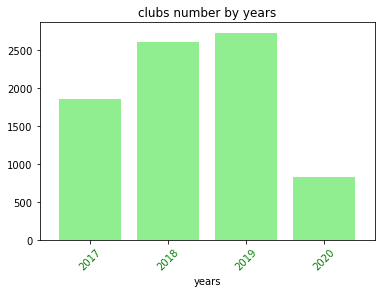

In [9]:
# график распределения количества новых клубов по годам
funs_club_years.plot(y='funs_club', kind='bar', color='lightgreen', title='clubs number by years',
                    xlabel='years', legend=False, width=0.8).\
                    set_xticklabels(funs_club_years.foundation_date, color='green', rotation=45)

<AxesSubplot:title={'center':'gender distribution'}, ylabel='founder_gender'>

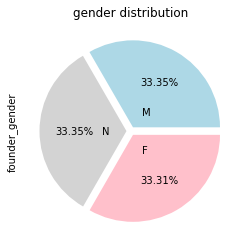

In [10]:
# создадим круговую диаграмму состава учредителей клубов по их полу
founders_1['founder_gender'].value_counts().plot(kind='pie', title='gender distribution', autopct='%1.2f%%',
                                      colors=['lightblue', 'lightgrey', 'pink'],
                                     labeldistance=0.2, explode=[0.05, 0.05, 0.05])

In [11]:
# графики количества новых членов клубов и суммы уплаченных взносов по годам
members_by_years=members_13.groupby(members_13['entry_date'].dt.year).\
             agg({'member_name':'count', 'sum_fee_paid':'sum' })\
            .reset_index().set_index('entry_date')
members_by_years

,member_name,sum_fee_paid
entry_date,,
2017,29926,24829146.0
2018,43314,30496423.0
2019,43643,24367367.0
2020,14106,6543365.0


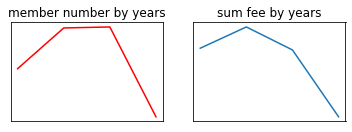

In [12]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)

ax_1.set(title = 'member number by years', xticks=[], yticks=[])
ax_2.set(title = 'sum fee by years', xticks=[], yticks=[])

ax_1.plot(members_by_years.member_name, color='red')
ax_2.plot(members_by_years.sum_fee_paid)

plt.show()

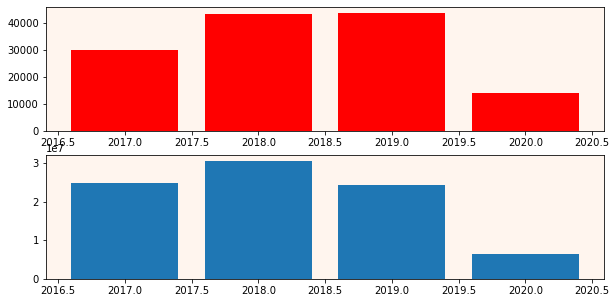

In [13]:
fig, axes = plt.subplots(2, 1)

axes[0].bar(members_by_years.index, members_by_years.member_name, color='red') 
axes[1].bar(members_by_years.index, members_by_years.sum_fee_paid)

axes[0].set_facecolor('seashell')
axes[1].set_facecolor('seashell')
fig.set_facecolor('white')
fig.set_figwidth(10)    #  ширина Figure
fig.set_figheight(5)    #  высота Figure

plt.show()

# библиотека seaborn

In [14]:
import seaborn as sns

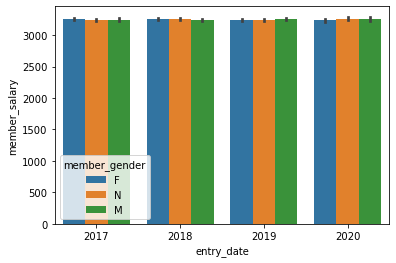

In [15]:
# график зарплат членов клубов в разрезе пола и за каждый год
sns.barplot(x=(members_13['entry_date'].dt.year), y="member_salary", hue="member_gender", data=members_13);

In [16]:
members_13.groupby([(members_13['entry_date'].dt.year), 'state_name'])['member_name'].count().unstack()

state_name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
entry_date,,,,,,,,,,,,,,,,,,,,,
2017,596,151,297,396,1684,449,246,78,5,1298,...,301,555,1943,343,139,775,656,388,765,165
2018,804,213,459,619,2399,676,422,134,5,1972,...,376,820,2849,462,203,1137,960,524,1082,212
2019,868,208,506,621,2475,670,363,121,6,1943,...,393,828,2815,419,188,1140,967,520,1119,180
2020,272,72,142,196,726,223,119,37,2,643,...,126,263,932,166,65,389,280,158,349,61


In [17]:
# график распределения количества членов клубов по штатам в разные годы
members_number_by_state_years=members_13.pivot_table(index=(members_13['entry_date'].dt.year), columns='state_name', 
                       values='member_name', aggfunc='count')
members_number_by_state_years

state_name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
entry_date,,,,,,,,,,,,,,,,,,,,,
2017,596,151,297,396,1684,449,246,78,5,1298,...,301,555,1943,343,139,775,656,388,765,165
2018,804,213,459,619,2399,676,422,134,5,1972,...,376,820,2849,462,203,1137,960,524,1082,212
2019,868,208,506,621,2475,670,363,121,6,1943,...,393,828,2815,419,188,1140,967,520,1119,180
2020,272,72,142,196,726,223,119,37,2,643,...,126,263,932,166,65,389,280,158,349,61


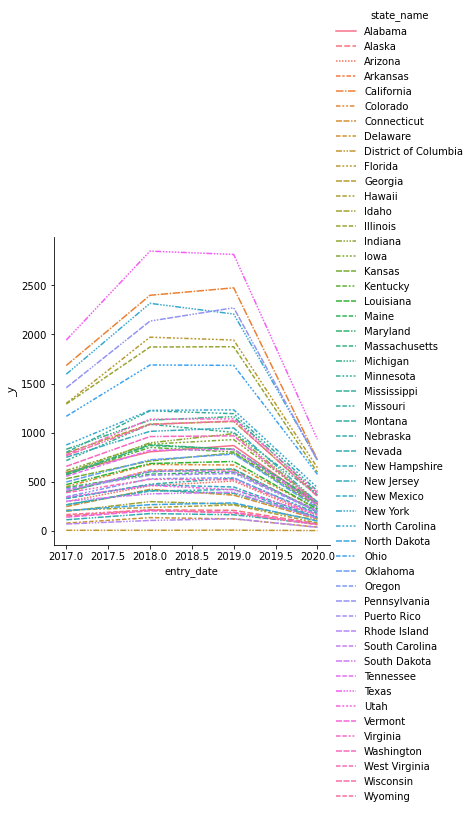

In [18]:
sns.relplot(data=members_number_by_state_years, kind="line")

<AxesSubplot:xlabel='entry_date', ylabel='sum_fee_paid'>

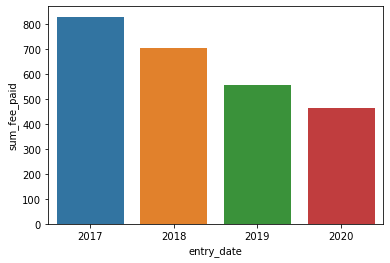

In [19]:
# визуализация сумм уплаченных взносов по годам
sns.barplot(data=members_13, x=(members_13['entry_date'].dt.year), y="sum_fee_paid", ci=None)